In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/' , one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28
n_channel = 4


In [4]:
X = tf.placeholder(tf.float32 , [None , 28,28,1])

In [5]:
W1 = tf.Variable(tf.random_normal([5,5,1,n_channel] , stddev=0.01))
L1 = tf.nn.conv2d(X,W1,strides=[1,2,2,1] , padding='SAME')
L1 = tf.nn.relu(L1)
W_encode = tf.Variable(tf.random_normal([14*14*n_channel , 256] , stddev=0.01))
L2 = tf.reshape(L1 , [-1 , 14*14*n_channel])
h = tf.matmul(L2 , W_encode)

In [6]:
output_batch = tf.shape(X)[0]
deconv_shape = tf.stack([output_batch , 28 , 28 , 1])
W_decode = tf.Variable(tf.random_normal([256 , 14*14*n_channel]))
L3 = tf.matmul(h , W_decode)
W3 = tf.Variable(tf.random_normal([5,5,1,n_channel]))
L3 = tf.reshape(L3 , [-1,14,14,n_channel])

decoder = tf.nn.conv2d_transpose(L3 , W3 , output_shape=deconv_shape , strides=[1,2,2,1] , padding='SAME')

decoder = tf.nn.sigmoid(decoder)

In [7]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
total_batch = int(mnist.train.num_examples/batch_size)

In [10]:
for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)
        _ , cost_val = sess.run([opt , cost] , feed_dict={X:batch_xs.reshape(-1,28,28,1)})
        total_cost += cost_val
    print('Epoch : {} \n Avg.Cost = {}'.format(epoch , total_cost/total_batch))

Epoch : 0 
 Avg.Cost = 0.02775989804924889
Epoch : 1 
 Avg.Cost = 0.010397983980788426
Epoch : 2 
 Avg.Cost = 0.005891958175396377
Epoch : 3 
 Avg.Cost = 0.004425200607881628
Epoch : 4 
 Avg.Cost = 0.003913785433820025
Epoch : 5 
 Avg.Cost = 0.003240803462791849
Epoch : 6 
 Avg.Cost = 0.00263812046286396
Epoch : 7 
 Avg.Cost = 0.0022272397984157907
Epoch : 8 
 Avg.Cost = 0.0020141039771789855
Epoch : 9 
 Avg.Cost = 0.001872361099389805
Epoch : 10 
 Avg.Cost = 0.0017938542535359209
Epoch : 11 
 Avg.Cost = 0.0017474165205335753
Epoch : 12 
 Avg.Cost = 0.001713259735102342
Epoch : 13 
 Avg.Cost = 0.0016731836801310155
Epoch : 14 
 Avg.Cost = 0.0016342196404002607
Epoch : 15 
 Avg.Cost = 0.0016383288641968234
Epoch : 16 
 Avg.Cost = 0.0016140019713731652
Epoch : 17 
 Avg.Cost = 0.0016042719427919524
Epoch : 18 
 Avg.Cost = 0.0015420943902890113
Epoch : 19 
 Avg.Cost = 0.001510924411810596


In [13]:
n = 4
canvas_orig = np.empty((28*n , 28*n))
canvas_recon = np.empty((28*n , 28*n))
for i in range(n):
    batch_x , _ = mnist.test.next_batch(n)
    g = sess.run(decoder , feed_dict={X:batch_x.reshape(-1,28,28,1)})
    for j in range(n):
        canvas_orig[i*28:(i+1)*28 , j*28:(j+1)*28] = batch_x[j].reshape([28,28])
    for j in range(n):
        canvas_recon[i*28:(i+1)*28 , j*28:(j+1)*28] = g[j].reshape([28,28])

Origin


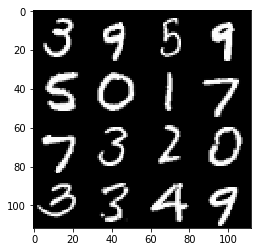

Restructed


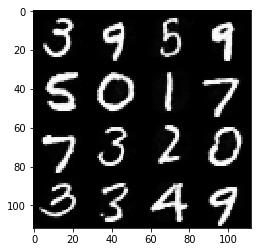

In [14]:
print('Origin')
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig , origin='upper' , cmap='gray')
plt.show()

print('Restructed')
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon , origin='upper' , cmap='gray')
plt.show()

In [29]:
print(W3.read_value)

<bound method RefVariable.read_value of <tf.Variable 'Variable_3:0' shape=(5, 5, 1, 32) dtype=float32_ref>>


In [32]:
W3.read_value(0)

TypeError: read_value() takes 1 positional argument but 2 were given